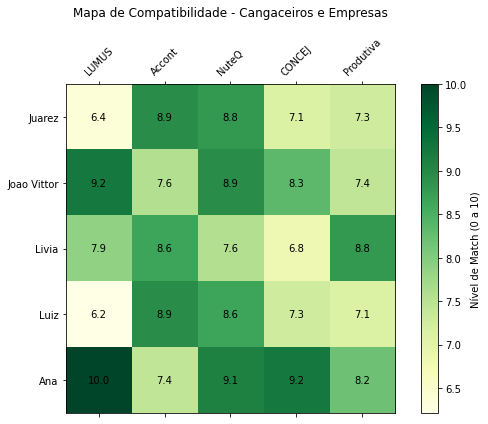

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def calcular_match(cangaceiros, empresas):
    match_matrix = pd.DataFrame(index=cangaceiros['Cangaceiro'], columns=empresas['Empresa'])
    
    for cangaceiro in cangaceiros.itertuples(index=False, name=None):
        for empresa in empresas.itertuples(index=False, name=None):
            
            cangaceiro_nome, afinidade_g1, afinidade_g2, afinidade_g3, \
            afinidade_i1, afinidade_i2, afinidade_i3, afinidade_i4, cangaceiro_localidade = cangaceiro
            
            empresa_nome, area_atuacao, maior_necessidade, segunda_necessidade, empresa_localidade = empresa
            
            
            afinidade_geral = max(afinidade_g1, afinidade_g2, afinidade_g3)
            
            maior_necessidade_match = 0
            if maior_necessidade == 'Solução e Modelo de Negócios':
                maior_necessidade_match = afinidade_i1
            elif maior_necessidade == 'Vendas e Mercado':
                maior_necessidade_match = afinidade_i2
            elif maior_necessidade == 'Gestão e Operação':
                maior_necessidade_match = afinidade_i3
            elif maior_necessidade == 'Time e Cultura':
                maior_necessidade_match = afinidade_i4
            
            segunda_necessidade_match = 0
            if segunda_necessidade == 'Solução e Modelo de Negócios':
                segunda_necessidade_match = afinidade_i1
            elif segunda_necessidade == 'Vendas e Mercado':
                segunda_necessidade_match = afinidade_i2
            elif segunda_necessidade == 'Gestão e Operação':
                segunda_necessidade_match = afinidade_i3
            elif segunda_necessidade == 'Time e Cultura':
                segunda_necessidade_match = afinidade_i4
            
            localidade_match = 0.5 if cangaceiro_localidade == empresa_localidade else 0
            
            
            total_match = (afinidade_geral * 1.5) + (maior_necessidade_match * 3) + (segunda_necessidade_match * 2) + localidade_match
            match_matrix.at[cangaceiro_nome, empresa_nome] = round(total_match / 3.3, 2) 
    
    return match_matrix


cangaceiros = pd.read_excel('Base_Cangaceiros_Empresas.xlsx', sheet_name='Cangaceiros')
empresas = pd.read_excel('Base_Cangaceiros_Empresas.xlsx', sheet_name='Empresas')


match_matrix = calcular_match(cangaceiros, empresas)

fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.matshow(match_matrix.astype(float), cmap='YlGn')


for (i, j), val in np.ndenumerate(match_matrix.values):
    ax.text(j, i, f'{val:.1f}', ha='center', va='center', color='black')


ax.set_xticks(range(len(match_matrix.columns)))
ax.set_yticks(range(len(match_matrix.index)))
ax.set_xticklabels(match_matrix.columns, rotation=45)
ax.set_yticklabels(match_matrix.index)


plt.colorbar(cax, label='Nível de Match (0 a 10)')


plt.title('Mapa de Compatibilidade - Cangaceiros e Empresas', pad=20)

plt.tight_layout()
plt.show()
